In [145]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [146]:
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

import io
import os
import zipfile

#function to download from the url

def getCSV(url, cache_name=None, is_zip=False, saved=False, **kwargs):
    cache_name = cache_name or os.path.basename(url)
    csv_file = os.path.join(os.getenv('PUIDATA', './'), cache_name)
    
    if os.path.isfile(csv_file) and not saved:
        print('Loading from:', csv_file)
        return pd.read_csv(csv_file) 
    else:
        print('Not in PUIDATA. Loading from url.')
        if is_zip:
            # Get zip buffer
            remotezip = urllib.urlopen(url).read()

            # Open in memory
            with zipfile.ZipFile(io.BytesIO(remotezip)) as z:
                # Read the filename or the first file if there are naming inconsistencies
                read_zip_file = cache_name if cache_name in z.namelist() else z.namelist()[0]
                df = pd.read_csv(z.open(read_zip_file), **kwargs)
        else:
            df = pd.read_csv(urllib.urlopen(url), **kwargs)

        # Save dataframe as cached 
        df.to_csv(csv_file, index=False)
    return df

In [148]:
#fetching data
df = getCSV(
    'http://www.aqhi.gov.hk/epd/ddata/html/history/2017/201710_Eng.csv', 
    is_zip=False, skiprows=7, cache_name='hkair_qualitydata_201710'#, saved=True
).dropna(how='all', axis=1)


Loading from: /home/cusp/ic1018/PUIdata/hkair_qualitydata_201710


In [149]:
df

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Tseung Kwan O,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
0,2017-10-01,01,4*,4,4,4,3,3,4,3,3,3,4,4,4,4,4,4
1,NaN,02,4*,4,4,3,3,3,4,3,3,3,4,4,4,4,3,4
2,NaN,03,3*,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3
3,NaN,04,3*,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,NaN,05,3*,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5,NaN,06,3*,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,NaN,07,3*,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3
7,NaN,08,3*,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3
8,NaN,09,3*,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3
9,NaN,10,3*,3,3,3,3,2,3,2,3,3,3,3,3,3,3,3


In [150]:
#Converting all the AQHI values to numeric
df['Central/Western']= pd.to_numeric(df['Central/Western'], errors='coerce')
df['Eastern']= pd.to_numeric(df['Eastern'], errors='coerce')
df['Kwun Tong']= pd.to_numeric(df['Kwun Tong'], errors='coerce')
df['Sham Shui Po']= pd.to_numeric(df['Sham Shui Po'], errors='coerce')
df['Kwai Chung']= pd.to_numeric(df['Kwai Chung'], errors='coerce')
df['Tsuen Wan']= pd.to_numeric(df['Tsuen Wan'], errors='coerce')
df['Tseung Kwan O']= pd.to_numeric(df['Tseung Kwan O'], errors='coerce')
df['Yuen Long']= pd.to_numeric(df['Yuen Long'], errors='coerce')
df['Tuen Mun']= pd.to_numeric(df['Tuen Mun'], errors='coerce')
df['Tung Chung']= pd.to_numeric(df['Tung Chung'], errors='coerce')
df['Tai Po']= pd.to_numeric(df['Tai Po'], errors='coerce')
df['Sha Tin']= pd.to_numeric(df['Sha Tin'], errors='coerce')
df['Tap Mun']= pd.to_numeric(df['Tap Mun'], errors='coerce')
df['Causeway Bay']= pd.to_numeric(df['Causeway Bay'], errors='coerce')
df['Central']= pd.to_numeric(df['Central'], errors='coerce')
df['Mong Kok']= pd.to_numeric(df['Mong Kok'], errors='coerce')


In [151]:
df

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Tseung Kwan O,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
0,2017-10-01,01,NaN,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
1,NaN,02,NaN,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0
2,NaN,03,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0
3,NaN,04,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,NaN,05,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,NaN,06,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
6,NaN,07,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
7,NaN,08,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
8,NaN,09,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,NaN,10,NaN,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [152]:
#Filling the Date column for every hour and the Daily Max with the date of the corresponding first hour of every day
#when AQHI was measured
lower = 0
upper = 25
while upper<=775:
    for i in range(lower,upper):
        df['Date'][i] = df['Date'][lower]
    lower = lower +25
    upper = upper +25
    

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [153]:
df

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Tseung Kwan O,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
0,2017-10-01,01,NaN,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
1,2017-10-01,02,NaN,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0
2,2017-10-01,03,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0
3,2017-10-01,04,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,2017-10-01,05,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,2017-10-01,06,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
6,2017-10-01,07,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
7,2017-10-01,08,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
8,2017-10-01,09,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,2017-10-01,10,NaN,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [154]:
#Dropping NaN's
df = df.dropna(axis=0, how='any')

In [155]:
df.shape

(444, 18)

In [156]:
df

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Tseung Kwan O,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
24,2017-10-01,Daily Max,4.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
49,2017-10-02,Daily Max,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0
70,2017-10-03,21,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0
71,2017-10-03,22,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,4.0,3.0,3.0
72,2017-10-03,23,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,4.0,3.0,3.0
73,2017-10-03,24,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0
74,2017-10-03,Daily Max,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0
75,2017-10-04,01,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
76,2017-10-04,02,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0
77,2017-10-04,03,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0


In [158]:
#Grouping by the hour
dfgrouped = df.groupby("Hour").mean()
dfgrouped

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Tseung Kwan O,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
Hour,,,,,,,,,,,,,,,,
01,3.681818,3.863636,3.818182,3.681818,3.681818,3.454545,3.772727,3.500000,3.727273,3.090909,3.409091,3.318182,3.727273,4.272727,3.681818,3.954545
02,3.545455,3.727273,3.590909,3.454545,3.590909,3.318182,3.727273,3.363636,3.681818,3.000000,3.272727,3.181818,3.681818,3.909091,3.500000,3.681818
03,3.565217,3.608696,3.521739,3.434783,3.434783,3.391304,3.652174,3.391304,3.652174,3.130435,3.347826,3.260870,3.739130,3.695652,3.478261,3.434783
04,3.521739,3.565217,3.434783,3.347826,3.347826,3.347826,3.652174,3.304348,3.652174,3.130435,3.217391,3.173913,3.826087,3.347826,3.434783,3.347826
05,3.600000,3.533333,3.600000,3.466667,3.400000,3.466667,3.666667,3.333333,3.666667,3.133333,3.200000,3.200000,3.800000,3.466667,3.466667,3.400000
06,3.526316,3.578947,3.473684,3.368421,3.421053,3.210526,3.631579,3.473684,3.631579,2.947368,3.052632,3.157895,3.894737,3.263158,3.368421,3.263158
07,3.409091,3.454545,3.272727,3.136364,3.272727,2.954545,3.409091,3.181818,3.409091,2.727273,2.818182,2.909091,3.590909,3.181818,3.090909,3.045455
08,3.363636,3.454545,3.409091,3.181818,3.363636,2.954545,3.454545,3.227273,3.318182,2.636364,2.909091,2.954545,3.545455,3.500000,3.181818,3.136364
09,3.545455,3.681818,3.590909,3.409091,3.636364,3.318182,3.681818,3.500000,3.636364,2.772727,3.363636,3.454545,3.727273,3.954545,3.681818,3.590909


In [160]:
dfgrouped.columns.get_values

<bound method Index.get_values of Index(['Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Tseung Kwan O', 'Yuen Long', 'Tuen Mun', 'Tung Chung',
       'Tai Po', 'Sha Tin', 'Tap Mun', 'Causeway Bay', 'Central', 'Mong Kok'],
      dtype='object')>

In [163]:
dfgrouped.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       'Daily Max'],
      dtype='object', name='Hour')

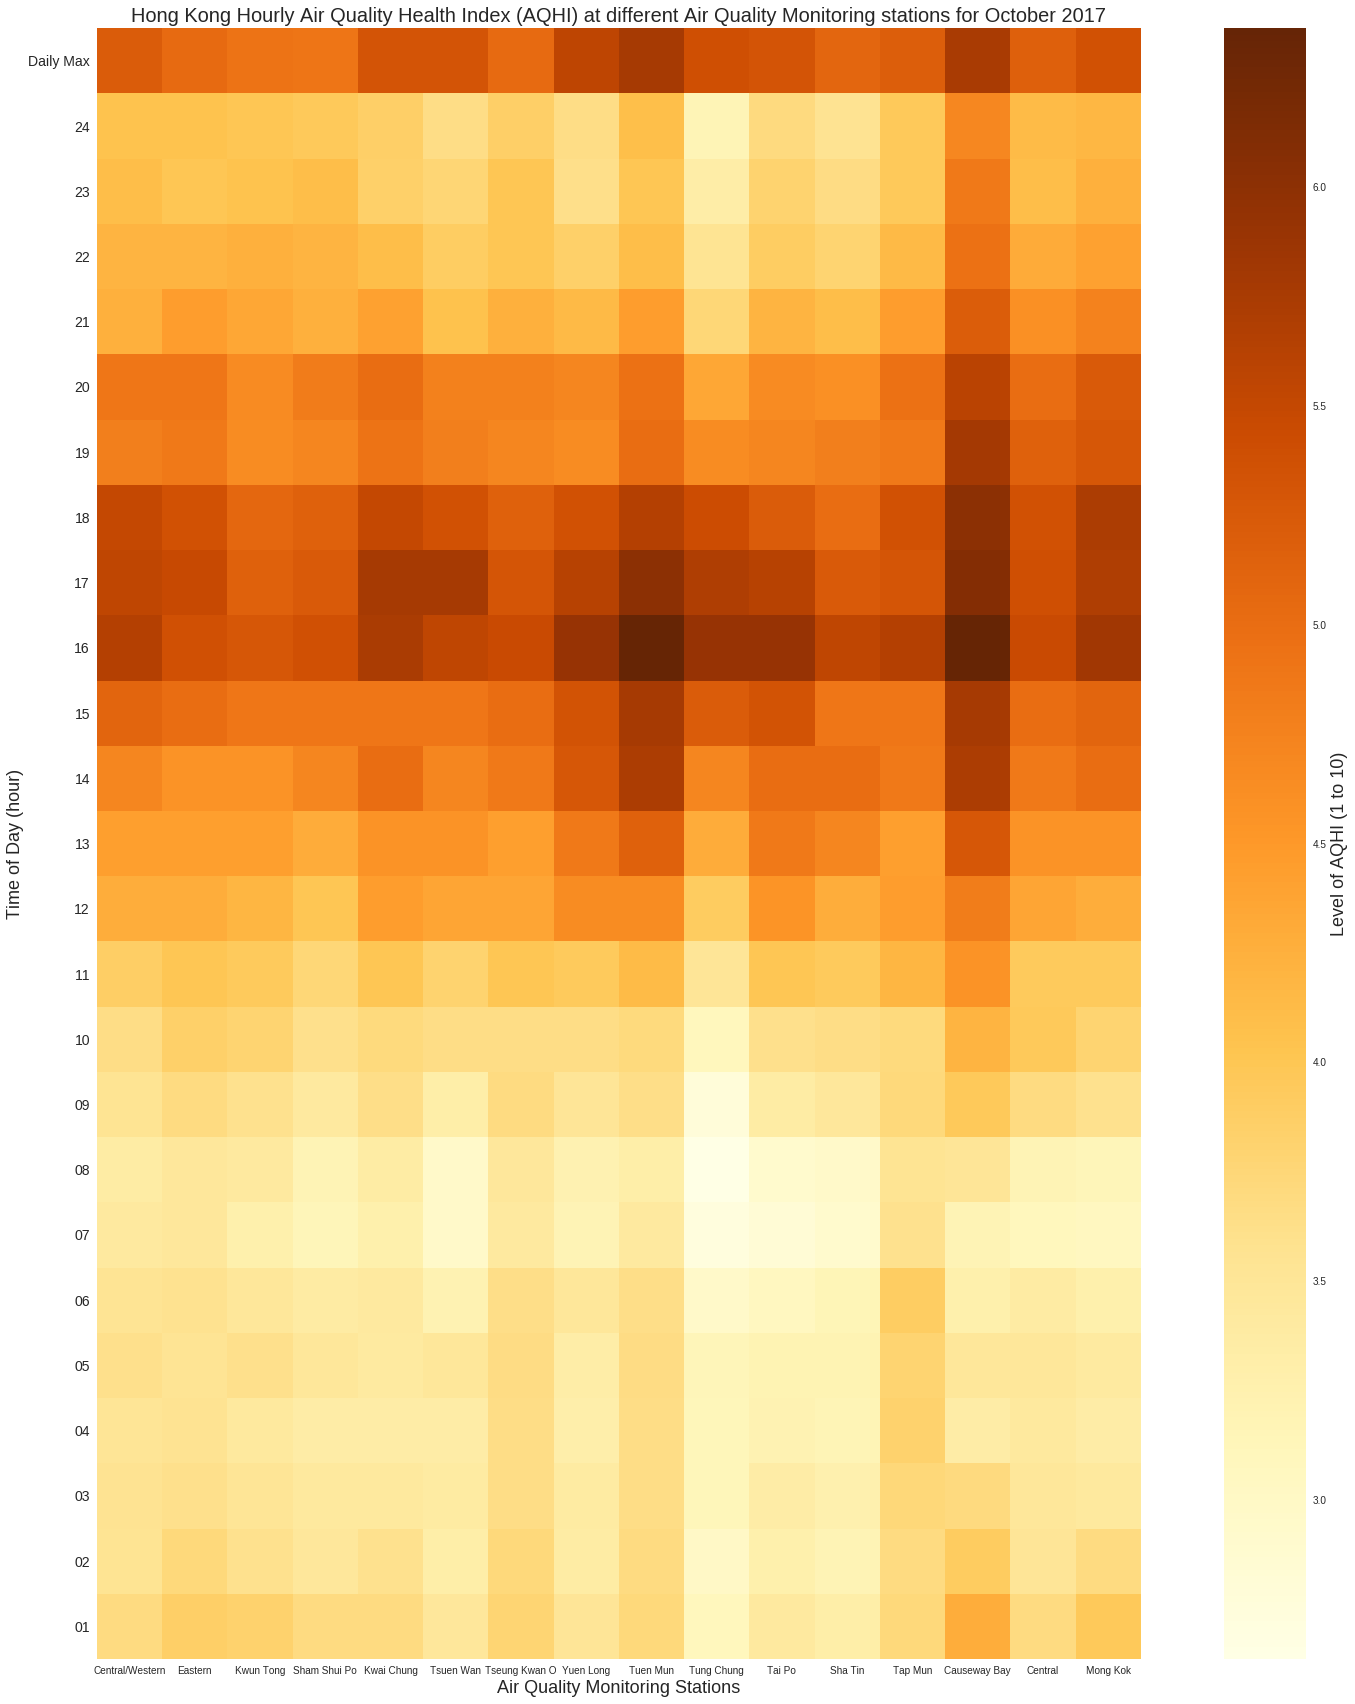

In [181]:
#Plotting the AQHI Map
plt.figure(figsize=(30,30))
ax = plt.subplot(1,1,1)
ax.grid(False)
plt.imshow(dfgrouped.values, cmap=cm.YlOrBr, origin='lower',interpolation='nearest')
plt.title('Hong Kong Hourly Air Quality Health Index (AQHI) at different Air Quality Monitoring stations for October 2017', fontsize=20)
plt.xlabel('Air Quality Monitoring Stations', fontsize=18)
plt.ylabel('Time of Day (hour)', fontsize=18)
plt.yticks(range(0, dfgrouped.values.shape[0], 1), range(1, dfgrouped.values.shape[0]+1, 1))
ax.set_yticklabels(dfgrouped.index,fontsize = 14)
plt.xticks(range(0,16))
ax.set_xticklabels(dfgrouped.columns,fontsize = 10)
plt.colorbar().set_label('Level of AQHI (1 to 10)', fontsize = 18);